In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd "/content"
!ls

/content
drive  sample_data


In [ ]:
!git clone https://github.com/OpenNMT/OpenNMT-py.git

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 21869, done.
remote: Total 21869 (delta 0), reused 0 (delta 0), pack-reused 21869 (from 1)
Receiving objects: 100% (21869/21869), 289.47 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (15712/15712), done.


In [ ]:
cd /content/OpenNMT-py

/content/OpenNMT-py


In [ ]:
!git checkout v1.2.0

Branch 'v1.2.0' set up to track remote branch 'v1.2.0' from 'origin'.
Switched to a new branch 'v1.2.0'


In [ ]:
!python setup.py install
!pip install torchtext==0.4.0
!pip install torch==1.4.0
!pip install tqdm==4.30.0

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/QLDA"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/QLDA
all_captions.txt  img		     test_document.txt	train_doc_name.txt  truncated_docs
article		  src_test.txt	     test_title.txt	train_document.txt  url
caption		  src_train.txt      tgt-test.txt	Train_Image_names
data.txt	  test_doc_name.txt  tgt-train.txt	train_title.txt


#EXTRACTION

In [ ]:
import re
import os
from tqdm import tqdm
from bs4 import BeautifulSoup
base = "/content/drive/MyDrive/QLDA"

In [ ]:
article_list = os.listdir(base + '/article')
print(len(article_list))

7944


In [ ]:
article_list[0:4]

['880f411f0c4fc8528c299c0223173d457d2b0049.txt',
 '1cedb09c9e20c08bdef71f98fe43e4677a9709db.txt',
 '48254ccb210b9f3c833877790c72a2afe1899242.txt',
 '5fb424d964ba019649f640cdf06945aaf539c4c6.txt']

In [ ]:
#TRAIN_DATA
#
head=open('train_title.txt','w')
document=open('train_document.txt','w')
doc_name=open('train_doc_name.txt','w')

for article_name in article_list[0:4]:
  with open(base +'/article/'+ article_name,'r') as article:
      print(article_name)
      art=article.read()
      x=re.sub(r'\s',' ',art)
      x=re.sub('\@body','\n@body',x)
      x=re.sub('\@summary','\n@summary',x)
      with open("data.txt",'w') as f:
          f.write(x)
      with open("data.txt",'r') as f:
          doc=f.readlines()
      summary=[]
      for i in doc:
          i=re.sub(r'\s',' ',i)
          if '@title' in i:
              title=i
          if '@body' in i:
              body=i

      if len(body.split())> 25 and len(title.split())> 3 :
          head.write(re.sub('\@title','',title)+"\n")
          document.write(re.sub('\@body','',body)+"\n")
          doc_name.write(article_name+'\n')

#
head.close()
document.close()
doc_name.close()

print("Done.")

880f411f0c4fc8528c299c0223173d457d2b0049.txt
1cedb09c9e20c08bdef71f98fe43e4677a9709db.txt
48254ccb210b9f3c833877790c72a2afe1899242.txt
5fb424d964ba019649f640cdf06945aaf539c4c6.txt
Done.


In [ ]:
test_article_list = ["00aaa4c024ca251531a06306ed352cbfa11f7f0a.txt",
                     "00b1b35a62cb2fd089a1e4d369c411a2c8554c94.txt",
                     "00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc.txt",
                     "00cb4c6e4a552526d76c8c4a6efab9ee00512ae3.txt"]

In [ ]:
#TEST_DATA
#
head=open('test_title.txt','w')
document=open('test_document.txt','w')
doc_name=open('test_doc_name.txt','w')

for article_name in test_article_list:
  with open(base +'/article/'+ article_name,'r') as article:
      print(article_name)
      art=article.read()
      x=re.sub(r'\s',' ',art)
      x=re.sub('\@body','\n@body',x)
      x=re.sub('\@summary','\n@summary',x)
      with open("data.txt",'w') as f:
          f.write(x)
      with open("data.txt",'r') as f:
          doc=f.readlines()
      summary=[]
      for i in doc:
          i=re.sub(r'\s',' ',i)
          if '@title' in i:
              title=i
          if '@body' in i:
              body=i

      if len(body.split())> 25 and len(title.split())> 3 :
          head.write(re.sub('\@title','',title)+"\n")
          document.write(re.sub('\@body','',body)+"\n")
          doc_name.write(article_name+'\n')

#
head.close()
document.close()
doc_name.close()

print("Done.")

00aaa4c024ca251531a06306ed352cbfa11f7f0a.txt
00b1b35a62cb2fd089a1e4d369c411a2c8554c94.txt
00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc.txt
00cb4c6e4a552526d76c8c4a6efab9ee00512ae3.txt
Done.


#CLEAN

In [ ]:
contraction_mapping = {
    "ain't": "is not",
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "i'm": "i am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "i've": "i have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have"
}

In [ ]:
def cleaning(doc,contraction_mapping):
    clean=[]
    for i in tqdm(doc):
        low=str(i).lower()
        soup=BeautifulSoup(low,'lxml')
        low=soup.text
        low=re.sub(" '","'",low)
        low=re.sub(" n't","n't",low)
        sent=[]
        for m in (low.split()):
            if m in contraction_mapping:
                sent.append(contraction_mapping[m])
            else:
                sent.append(m)
        jnt=' '.join(sent)
        low=re.sub("'s","",jnt)
        low=re.sub("’s","",low)
        new=re.sub("\n",'',low)
        new=re.sub(r'[\$\"\(\)\)\#\:\@\=\>\<\-\`\-\-\/\;\‘\£\%\*\—]',' ',new)
        new=re.sub(",",'',new)
        new=re.sub('\!','.',new)
        new=re.sub('\?','.',new)
        new=re.sub("'",'',new)
        new=re.sub("°",'',new)
        new=re.sub("\.\.\.",'.',new)
        new=re.sub(r"[^a-zA-Z0-9]",' ',new)
        new=(re.sub(r'[\s]+',' ',new)).strip()
        clean.append(new)
    return clean

In [ ]:
#
print("Cleaning Source Training Data")
with open("train_document.txt",'r') as file:
    doc=file.readlines()
final_data=cleaning(doc,contraction_mapping)

with open("src_train.txt",'w') as file:
    for summary in tqdm(final_data):
        file.write(summary+'\n')

#
print("Cleaning Target Training Data")
with open("train_title.txt",'r') as file:
    doc=file.readlines()
final_data=cleaning(doc,contraction_mapping)

with open("tgt-train.txt",'w') as file:
    for summary in tqdm(final_data):
        file.write(summary+'\n')


100%|███████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 646.47it/s]

Cleaning Source Training Data



100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2362.99it/s]


Cleaning Target Training Data


100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3617.34it/s]


In [ ]:
#
print("Cleaning Source Test Data")
with open("test_document.txt",'r') as file:
    doc=file.readlines()
final_data=cleaning(doc,contraction_mapping)

with open("src_test.txt",'w') as file:
    for summary in tqdm(final_data):
        file.write(summary+'\n')

#
print("Cleaning Target Test Data")
with open("test_title.txt",'r') as file:
    doc=file.readlines()
final_data=cleaning(doc,contraction_mapping)

with open("tgt-test.txt",'w') as file:
    for summary in tqdm(final_data):
        file.write(summary+'\n')


100%|███████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 324.39it/s]


Cleaning Source Test Data


100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1385.40it/s]


Cleaning Target Test Data


100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 5166.99it/s]


#IMAGE CAPTION

In [ ]:
#Re-Normalize doc_name
import re

with open("test_doc_name.txt",'r') as doc:
  article_list = doc.readlines()

clean_ar_list=[]
for i in article_list:
  d1 = re.sub('\n',"", i)
  d2 = re.sub('\.txt',"", d1)
  clean_ar_list.append(d2)

clean_ar_list

['00aaa4c024ca251531a06306ed352cbfa11f7f0a',
 '00b1b35a62cb2fd089a1e4d369c411a2c8554c94',
 '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc',
 '00cb4c6e4a552526d76c8c4a6efab9ee00512ae3']

In [ ]:
import os
image_fold = os.listdir("/content/drive/MyDrive/QLDA/img")

In [ ]:
image_list = []
# clean_ar_list = ['00b27060a4e833ac1867db07fd2fa1aafb63bf46']
for article_i in clean_ar_list:
  article_i_image = []
  for image_i in image_fold:
    #print(article_i, image_i)
    if article_i in image_i:
      article_i_image.append(re.sub('\.jpg','',image_i))
  #
  if article_i_image == []:
    image_list.append('None')
  else:
    image_list.append(article_i_image)

In [ ]:
image_list

[['00aaa4c024ca251531a06306ed352cbfa11f7f0a_7',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_5',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_6',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_4',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_2',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_14',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_13',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_3',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_12',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_10',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_15',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_8',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_9',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_11',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_1'],
 ['00b1b35a62cb2fd089a1e4d369c411a2c8554c94_1',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_2'],
 ['00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_3',
  '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_2',
  '00c93d4f7e4df545b38d7c7c0e2d9

In [ ]:
#save
with open("Train_Image_names", "w") as file:
  for i in image_list:
    file.write('\t'.join(i)+'\n')

file

<_io.TextIOWrapper name='Train_Image_names' mode='w' encoding='UTF-8'>

#TRAIN

In [ ]:
%cd "/content"

/content


In [ ]:
cd /content/OpenNMT-py

/content/OpenNMT-py


In [ ]:
!python preprocess.py -train_src "/content/drive/MyDrive/QLDA/src_train.txt" -train_tgt "/content/drive/MyDrive/QLDA/tgt-train.txt"  -save_data data/data --src_seq_length 110 --src_seq_length_trunc 110 --tgt_seq_length 26 --tgt_seq_length_trunc 26 --src_vocab_size 2300 --tgt_vocab_size 8500 -overwrite

/content/OpenNMT-py/onmt/modules/sparse_activations.py:48: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, dim=0):
/content/OpenNMT-py/onmt/modules/sparse_activations.py:68: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/content/OpenNMT-py/onmt/modules/sparse_losses.py:13: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, target):
/content/OpenNMT-py/onmt/modules/sparse_losses.py:37: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/content/OpenNMT-py/onmt/models/sru.py:397: FutureWarning: `torch.cuda.amp.custom

In [ ]:
!python train.py -data data/data -save_model "/content/sample_data" \
           --valid_steps 10 --valid_batch_size 128 --save_checkpoint_steps 10 \
           -global_attention mlp \
           -word_vec_size 128 \
           -rnn_size 512 \
           -layers 1 \
           -encoder_type brnn \
           -train_steps 70 \
           -max_grad_norm 2 \
           -dropout 0.4 \
           -batch_size 128 \
           -optim adagrad \
           -learning_rate 0.15 \
           -adagrad_accumulator_init 0.1 \
           -gpu_ranks 0
           #-train_from '/content/OpenNMT-py/data/drive/My Drive/demo-model_step_37000.pt'

/content/OpenNMT-py/onmt/modules/sparse_activations.py:48: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, dim=0):
/content/OpenNMT-py/onmt/modules/sparse_activations.py:68: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/content/OpenNMT-py/onmt/modules/sparse_losses.py:13: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, target):
/content/OpenNMT-py/onmt/modules/sparse_losses.py:37: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/content/OpenNMT-py/onmt/models/sru.py:397: FutureWarning: `torch.cuda.amp.custom

In [ ]:
!python translate.py -model "/content/sample_data_step_70.pt" -src "/content/drive/MyDrive/QLDA/src_test.txt" -output "/content/sample_data/pred_mlp.txt" -verbose \
                    --batch_size 1 --gpu 0

/content/OpenNMT-py/onmt/modules/sparse_activations.py:48: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, dim=0):
/content/OpenNMT-py/onmt/modules/sparse_activations.py:68: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/content/OpenNMT-py/onmt/modules/sparse_losses.py:13: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, target):
/content/OpenNMT-py/onmt/modules/sparse_losses.py:37: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/content/OpenNMT-py/onmt/models/sru.py:397: FutureWarning: `torch.cuda.amp.custom

#BLEU-SCORE

In [ ]:
!ls

available_models  dist					    onmt		  setup.py
build		  docs					    OpenNMT_py.egg-info   tools
CHANGELOG.md	  floyd_requirements.txt		    preprocess.py	  train.py
config		  floyd.yml				    README.md		  translate.py
CONTRIBUTING.md   github_deploy_key_opennmt_opennmt_py.enc  requirements.opt.txt
data		  LICENSE.md				    server.py


In [ ]:
!wget https://raw.githubusercontent.com/moses-smt/mosesdecoder/master/scripts/generic/multi-bleu.perl
!chmod +x multi-bleu.perl

--2024-11-09 18:23:28--  https://raw.githubusercontent.com/moses-smt/mosesdecoder/master/scripts/generic/multi-bleu.perl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5234 (5.1K) [text/plain]
Saving to: ‘multi-bleu.perl’

multi-bleu.perl     100%[===================>]   5.11K  --.-KB/s    in 0s      

2024-11-09 18:23:28 (47.3 MB/s) - ‘multi-bleu.perl’ saved [5234/5234]



In [ ]:
!perl multi-bleu.perl "/content/drive/MyDrive/QLDA/tgt-test.txt" < "/content/sample_data/pred_mlp.txt" >> "/content/sample_data/bleuoutput_mlp.txt"

Use of uninitialized value in division (/) at multi-bleu.perl line 139, <STDIN> line 4.
Use of uninitialized value in division (/) at multi-bleu.perl line 139, <STDIN> line 4.
Use of uninitialized value in division (/) at multi-bleu.perl line 139, <STDIN> line 4.
It is not advisable to publish scores from multi-bleu.perl.  The scores depend on your tokenizer, which is unlikely to be reproducible from your paper or consistent across research groups.  Instead you should detokenize then use mteval-v14.pl, which has a standard tokenization.  Scores from multi-bleu.perl can still be used for internal purposes when you have a consistent tokenizer.


In [ ]:
with open("/content/sample_data/bleuoutput_mlp.txt",'r') as file:
  print(file.readlines())

['BLEU = 0.00, 7.8/0.0/0.0/0.0 (BP=0.519, ratio=0.604, hyp_len=64, ref_len=106)\n']


## Captions

In [ ]:
image_list

[['00aaa4c024ca251531a06306ed352cbfa11f7f0a_7',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_5',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_6',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_4',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_2',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_14',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_13',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_3',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_12',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_10',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_15',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_8',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_9',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_11',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_1'],
 ['00b1b35a62cb2fd089a1e4d369c411a2c8554c94_1',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_2'],
 ['00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_3',
  '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_2',
  '00c93d4f7e4df545b38d7c7c0e2d9

In [ ]:
sorted_image_list = []
for sublist in image_list:
  sorted_image_list.append(sorted(sublist, key=lambda x: int(re.search(r'_(\d+)$', x).group(1))))

In [ ]:
sorted_image_list

[['00aaa4c024ca251531a06306ed352cbfa11f7f0a_1',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_2',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_3',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_4',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_5',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_6',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_7',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_8',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_9',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_10',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_11',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_12',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_13',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_14',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_15'],
 ['00b1b35a62cb2fd089a1e4d369c411a2c8554c94_1',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_2',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3'],
 ['00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_1',
  '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_2',
  '00c93d4f7e4df545b38d7c7c0e2d9

In [ ]:
import os

caption_dir = "/content/drive/MyDrive/QLDA/caption/"
caption_list = []

for image_names in sorted_image_list:
  if image_names == 'None':
    caption_list.append('None')
  temp = []
  for image_name in image_names:
    caption_path = f"{image_name}.caption"
    temp.append(caption_path)
  caption_list.append(temp)

In [ ]:
caption_list

[['00aaa4c024ca251531a06306ed352cbfa11f7f0a_1.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_2.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_3.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_4.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_5.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_6.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_7.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_8.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_9.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_10.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_11.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_12.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_13.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_14.caption',
  '00aaa4c024ca251531a06306ed352cbfa11f7f0a_15.caption'],
 ['00b1b35a62cb2fd089a1e4d369c411a2c8554c94_1.caption',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_2.caption',
  '00b1b35a62cb2fd089a1e4d369c411a2c8554c

In [ ]:
import os
import re

def read_captions_from_list(caption_list):
  all_captions = []
  all_captions_file_name = []
  for captions_image in caption_list:
    for file_path in captions_image:
        if file_path == "None":  #skip images with no captions
            continue
        with open(caption_dir + file_path, "r") as f:
            captions = f.readlines()
            for cap in captions:
                file_name_without_ext = os.path.splitext(file_path)[0]
                all_captions_file_name.append(file_name_without_ext)
                all_captions.append(cap.strip())
  return all_captions_file_name, all_captions

all_captions_file_name, all_captions = read_captions_from_list(caption_list)

In [ ]:
all_captions_file_name

['00aaa4c024ca251531a06306ed352cbfa11f7f0a_1',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_2',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_3',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_4',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_5',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_6',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_7',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_8',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_9',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_10',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_11',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_12',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_13',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_14',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_15',
 '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_1',
 '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_2',
 '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3',
 '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_1',
 '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_2',
 '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_3',
 '00c93

In [ ]:
with open("../all_captions.txt", "w") as output_file:
  for file_name, caption in zip(all_captions_file_name, all_captions):
    output_file.write(file_name + " " + caption + "\n")

In [ ]:
# %cd /content/OpenNMT-py
# !perl multi-bleu.perl "/content/drive/MyDrive/QLDA/tgt-test.txt" < "/content/all_captions.txt" >> "/content/bleuoutputcaption_mlp.txt"

In [ ]:
# with open("/content/bleuoutputcaption_mlp.txt",'r') as file:
#   print(file.readlines())

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

def calculate_bleu_from_file(file_path, all_captions):
  bleu_scores = []

  with open(file_path, 'r') as file:
    for line in file:
      target_sentence = line.strip()
      target_tokens = nltk.word_tokenize(target_sentence)

      for captions in caption_list:
        save = 0
        article_name = captions[0]
        article_name = re.sub(r'_\d+\.caption', '',article_name)
        for i in range(len(captions)):
          if captions[i] == 'None':
            continue
          reference_caption = all_captions[save + i]
          reference_tokens = nltk.word_tokenize(reference_caption)
          score = sentence_bleu([reference_tokens], target_tokens)
          print(f"Article Name: {article_name}")
          print(f"Target: {target_sentence}")
          print(f"Reference: {reference_caption}")
          print(f"BLEU Score: {score}")
          print("\n")
          bleu_scores.append(score)

        save += len(captions)

  return bleu_scores

file_path = '/content/drive/MyDrive/QLDA/tgt-test.txt'
bleu_scores = calculate_bleu_from_file(file_path, all_captions)

# for file_name, score in zip(all_captions_file_name, bleu_scores):
#   print(f"{file_name} BLEU={score}")

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Article Name: 00aaa4c024ca251531a06306ed352cbfa11f7f0a
Target: bad habits viewers watch in horror as the party girls ditch the nuns for a very boozy night at the pub before staggering back semi naked just in time for curfew
Reference: Night out: Rebecca, left, Sarah, centre, and Tyla, strike a pose before heading to the pub
BLEU Score: 3.8200273859445466e-155


Article Name: 00aaa4c024ca251531a06306ed352cbfa11f7f0a
Target: bad habits viewers watch in horror as the party girls ditch the nuns for a very boozy night at the pub before staggering back semi naked just in time for curfew
Reference: The girls staggered home after a trip to the pub quickly descended into a wild night out.&nbsp;Tyler, 22, (right) no doubt shocked the villagers as she exposed her bare derriere while staggering back to the convent
BLEU Score: 3.755653223556538e-155


Article Name: 00aaa4c024ca251531a06306ed352cbfa11f7f0a
Target: bad habits viewers watch in horror as the party girls ditch the nuns for a very boozy 

In [ ]:
end_file_name = "end_file_name"
with open("/content/bleu_scores_captions.txt", "w") as f:
  for file_name, score in zip(all_captions_file_name, bleu_scores):
    f.write(f"{file_name} BLEU={score}\n")
  f.write(f"{end_file_name} BLEU={0.0}\n")
print("BLEU scores saved to bleu_scores_captions.txt")

BLEU scores saved to bleu_scores_captions.txt


In [ ]:
bleu_scores

[3.8200273859445466e-155,
 3.755653223556538e-155,
 0.0919578260132217,
 2.015456226333724e-78,
 1.016127520387007e-231,
 4.890256141636662e-155,
 4.2275552407847875e-155,
 4.039187183453553e-155,
 1.6028333419145157e-78,
 1.091900080306308e-231,
 4.393655368849994e-155,
 5.402334537839271e-155,
 1.016127520387007e-231,
 1.1545437674642806e-231,
 1.132887314630247e-231,
 3.8200273859445466e-155,
 3.755653223556538e-155,
 0.0919578260132217,
 3.8200273859445466e-155,
 3.755653223556538e-155,
 0.0919578260132217,
 2.015456226333724e-78,
 1.016127520387007e-231,
 3.8200273859445466e-155,
 3.755653223556538e-155,
 0.0919578260132217,
 2.015456226333724e-78,
 1.016127520387007e-231,
 3.5224949176933916e-155,
 1.2246328222920828e-155,
 8.726094729337945e-232,
 8.278703315138962e-232,
 8.726094729337945e-232,
 2.234531706078715e-155,
 3.770445481082984e-155,
 1.1484186507842885e-231,
 1.0377133938315695e-231,
 1.0377133938315695e-231,
 5.43377291298632e-232,
 7.179169250817946e-232,
 8.726094

#CALCULATE BEST_IMAGE FOR EACH ARTICLE

In [ ]:
with open("/content/bleu_scores_captions.txt", "r") as f:
  arBleu_list = f.readlines()

In [ ]:
arBleu_list

['00aaa4c024ca251531a06306ed352cbfa11f7f0a_1 BLEU=3.8200273859445466e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_2 BLEU=3.755653223556538e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_3 BLEU=0.0919578260132217\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_4 BLEU=2.015456226333724e-78\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_5 BLEU=1.016127520387007e-231\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_6 BLEU=4.890256141636662e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_7 BLEU=4.2275552407847875e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_8 BLEU=4.039187183453553e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_9 BLEU=1.6028333419145157e-78\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_10 BLEU=1.091900080306308e-231\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_11 BLEU=4.393655368849994e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_12 BLEU=5.402334537839271e-155\n',
 '00aaa4c024ca251531a06306ed352cbfa11f7f0a_13 BLEU=1.016127520387007e-231\n'

In [ ]:
bleu_score = float(arBleu_list[0].split()[1][5:])
bleu_score

3.8200273859445466e-155

In [ ]:
ar_name = arBleu_list[10].split()[0].split("_")[1]
ar_name

'11'

In [ ]:
with open("/content/best_caption.txt", "w") as f:
  max_bleu = float(arBleu_list[0].split()[1][5:])
  pre_ar_name = arBleu_list[0].split()[0].split("_")[0]
  for index in range(1,len(arBleu_list)):
    article = arBleu_list[index]
    ar_name_i = article.split()[0].split("_")[0]
    id_i = article.split()[0].split("_")[1]
    bleu_score_i = float(article.split()[1][5:])

    if ar_name_i == pre_ar_name and index > 0:
      if bleu_score_i > max_bleu:
        max_bleu = bleu_score_i
        best_index = id_i

      print(pre_ar_name, " ", max_bleu)
    else:
      print(pre_ar_name)
      f.write(f"{pre_ar_name}_{best_index} \n")
      pre_ar_name = ar_name_i
      max_bleu = -1e9999

00aaa4c024ca251531a06306ed352cbfa11f7f0a   3.8200273859445466e-155
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a   0.0919578260132217
00aaa4c024ca251531a06306ed352cbfa11f7f0a
00b1b35a62cb2fd089a1e4d369c411a2c8554c94   3.755653223556538e-155
00b1b35a62cb2fd089a1

In [ ]:
with open("/content/best_caption.txt", "r") as f:
  best_list = f.readlines()
best_list

['00aaa4c024ca251531a06306ed352cbfa11f7f0a_3 \n',
 '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3 \n',
 '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_3 \n',
 '00cb4c6e4a552526d76c8c4a6efab9ee00512ae3_3 \n']

In [ ]:
%cd "/content/drive/MyDrive/QLDA"

/content/drive/MyDrive/QLDA


In [ ]:
%ls

all_captions.txt  img/               test_document.txt  train_doc_name.txt  truncated_docs/
article/          src_test.txt       test_title.txt     train_document.txt  url/
caption/          src_train.txt      tgt-test.txt       Train_Image_names
data.txt          test_doc_name.txt  tgt-train.txt      train_title.txt


In [ ]:
# Original target summary
with open("tgt-test.txt",'r') as file:
    original=file.readlines()
    original = [re.sub("\n",'',i) for i in original]
# Predicted summary
with open("/content/sample_data/pred_mlp.txt",'r') as file:
    predicted=file.readlines()
    predicted = [re.sub('\n','',i) for i in predicted]
# Best Image index file
with open("/content/best_caption.txt",'r') as file:
  best_cap = file.readlines()
  best_cap = [re.sub(" \n",'',cap) for cap in best_cap ]


In [ ]:
original

['bad habits viewers watch in horror as the party girls ditch the nuns for a very boozy night at the pub before staggering back semi naked just in time for curfew',
 'government issues travel advisory warning australians to reconsider travel to the philippines due to high threat of terror attack',
 'thug and his friend 15 who doused two men with an appletiser bottle full of acid leaving them partially blinded with life destroying scars are locked up for a total of 15 years',
 'justin rose closes in on another heroic comeback after third round 64 claws back seven shots on kiradech aphibarnrat at turkish airlines open']

In [ ]:
predicted

['stunning mourinho two surfers fans fans double ride months after gigantic wave to to to to',
 'stunning mourinho two surfers fans fans double ride months after girlfriend is to to to to',
 'stunning mourinho two surfers charged fans double ride months after gigantic wave to to to to',
 'stunning mourinho two surfers fans fans double ride months after gigantic wave to to to to']

In [ ]:
best_cap

['00aaa4c024ca251531a06306ed352cbfa11f7f0a_3',
 '00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3',
 '00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_3',
 '00cb4c6e4a552526d76c8c4a6efab9ee00512ae3_3']

In [ ]:
%ls

all_captions.txt  img/               test_document.txt  train_doc_name.txt  truncated_docs/
article/          src_test.txt       test_title.txt     train_document.txt  url/
caption/          src_train.txt      tgt-test.txt       Train_Image_names
data.txt          test_doc_name.txt  tgt-train.txt      train_title.txt


1
Original Summary :  bad habits viewers watch in horror as the party girls ditch the nuns for a very boozy night at the pub before staggering back semi naked just in time for curfew
Predicted Summary :  stunning mourinho two surfers fans fans double ride months after gigantic wave to to to to
Image Caption :  00aaa4c024ca251531a06306ed352cbfa11f7f0a_3
Generated Image


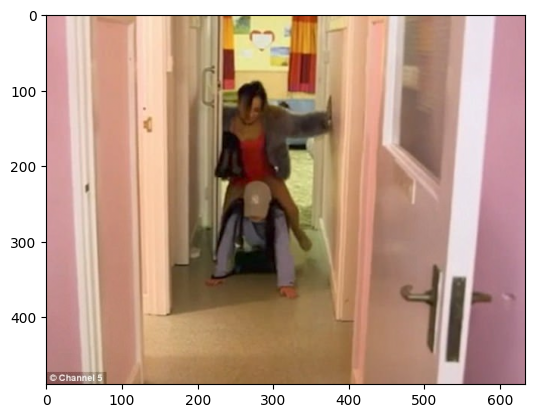

2
Original Summary :  government issues travel advisory warning australians to reconsider travel to the philippines due to high threat of terror attack
Predicted Summary :  stunning mourinho two surfers fans fans double ride months after girlfriend is to to to to
Image Caption :  00b1b35a62cb2fd089a1e4d369c411a2c8554c94_3
Generated Image


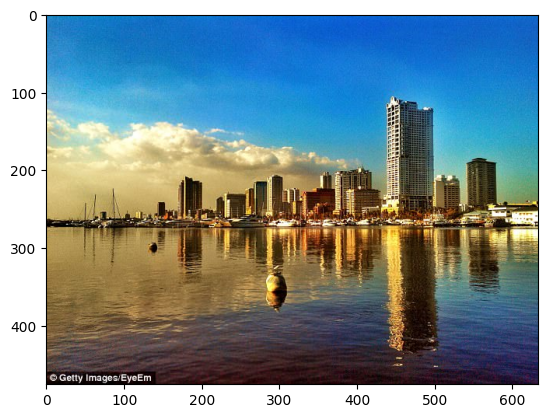

3
Original Summary :  thug and his friend 15 who doused two men with an appletiser bottle full of acid leaving them partially blinded with life destroying scars are locked up for a total of 15 years
Predicted Summary :  stunning mourinho two surfers charged fans double ride months after gigantic wave to to to to
Image Caption :  00c93d4f7e4df545b38d7c7c0e2d9aab2695bdbc_3
Generated Image


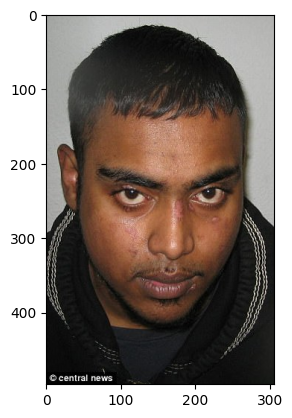

4
Original Summary :  justin rose closes in on another heroic comeback after third round 64 claws back seven shots on kiradech aphibarnrat at turkish airlines open
Predicted Summary :  stunning mourinho two surfers fans fans double ride months after gigantic wave to to to to
Image Caption :  00cb4c6e4a552526d76c8c4a6efab9ee00512ae3_3
Generated Image


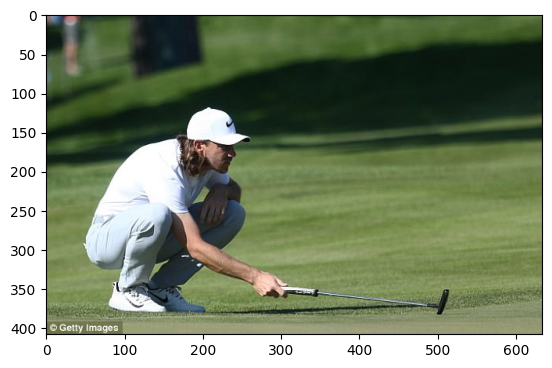

In [ ]:
import matplotlib.pyplot as plt

for i in range(4):
    print(i+1)
    print("Original Summary : ",original[i])
    print("Predicted Summary : ",predicted[i])
    print("Image Caption : ",best_cap[i])

    print("Generated Image")
    x=plt.imread("./img/"+best_cap[i]+'.jpg')
    plt.imshow(x/255.)
    plt.show()